In [1]:
import sys
print("python version: ", sys.version)

import pandas as pd
print("pandas version: ", pd.__version__)

import numpy as np
print('numpy version: ', np.__version__)

import scipy as sp
print('scipy version: ', sp.__version__)

import sklearn as skl
print('sklearn version: ', skl.__version__)

import matplotlib.pyplot as plt

import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = ""

import keras as ks
print('keras version: ', ks.__version__)
print('keras backend: ', ks.backend.backend())

import tensorflow as tf
print('tensorflow version: ', tf.__version__)

import warnings
warnings.filterwarnings('ignore')

from keras import backend as K
from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn.metrics import roc_curve, auc, f1_score, accuracy_score, precision_recall_curve

import random

python version:  3.8.0 | packaged by conda-forge | (default, Nov 22 2019, 19:11:38) 
[GCC 7.3.0]
pandas version:  1.4.2
numpy version:  1.22.4
scipy version:  1.8.1
sklearn version:  1.1.1
keras version:  2.9.0
keras backend:  tensorflow
tensorflow version:  2.9.1


In [2]:
from pandas.api.types import CategoricalDtype

In [3]:
excel_file = r'/home/kravchen/Desktop/NH/full_set_copy.xls'
df = pd.DataFrame(pd.read_excel(excel_file))

In [4]:
print(df.shape)

(13142, 208)


In [5]:
# Drop features
f_drop = ["Blank-1", "ws-sudden-stop", "ws-sudden-stop-drugs", "ws-prolonged-psychotropics", "mds-toilet-prgm-atmptd"] + \
         ['Deleted-%d' % i for i in range(1, 13)] + ['Psychotropic-%d' % i for i in range(1, 6)] + \
         ['Psychotropic-%d-average-daily-dose' % i for i in range(1, 6)] + ["Entry-discharge-type"]

f_drop += ["acute_mental_change", "aphasia", "balance_toileting", "balance_turning_around", "bipolar", "bph", \
           "cam_motor_retardation", "cerebralpalsy", "cirrhosis", "cms-long-stay", "comatose", "conduct_pain_assmnt",\
           "dysrhythmias", "embolisms", "facility", "hemiplegia/hemiparesis", "hepatitis", "huntingtons", "hyperkalemia",\
           "hypertension", "hyperthyroidism", "hyponatremia", "hypotension", "hypothyroidism", \
           "limb_prosthesis_past_7_days", "marital-status", "mds-conduct-staff-assessment-mental-status", \
           "mds-dehydrated", "mds-delirium-scale", "mds-excess-weight-loss", "mds-long-term-memory-ok", \
           "mds-pressure-ulcer-stage-1", "mds-pressure-ulcer-stage-2", "mds-pressure-ulcer-stage-3", \
           "mds-pressure-ulcer-stage-4", "mds-short-term-memory-ok", "mds-staff-assess-pain", "multiple-sclerosis", \
           "neurogenic-bladder", "obstructive-uropathy", "paraplegia", "pneumonia", "ptsd", "pvd", "quadriplegia", \
           "renal-failure", "schizophrenia", "septicemia", "stroke", "tourettes", "traumatic-brain-injury", \
           "tuberculosis", "wound", "ws-antibiotic-anticoag-coexposure", "ws-diuretic-adl", \
           "ws-meclizine-psych-coexposure", "ws-meclizine-psych-coexposure", "ws-meclizine-psych-coexposure",\
           "ws-meclizine-psych-coexposure", "ws-meclizine-psych-coexposure", \
           "ws-psychotropic-with-not-ordered-weight-loss", "ws-tramadol-antidepressant-coexposure"]
 
# Missing value means not relevant
f_one_hot = ["Mds-fall-2-6-months-to-admission", "Mds-fall-last-month-to-admission", "mds-pain-last-five-days", \
             "recent-start-other-fall-risk-rx"]
cate_one_hot = [['Yes', 'No', 'Unable to answer']] * 3 + [['Yes', 'No']]

#f_period = [("Psychotropic-%d-Start-date" % i, 'Psychotropic-%d-End-date' % i, 'Psychotropic-%d-Period' % i) for i in range(1, 6)]
f_period = [("Psychotropic-{}-Start-date".format(i), 'Psychotropic-{}-End-date'.format(i), 'Psychotropic-{}-Period'.format(i)) for i in range(1, 6)]

f_label = ['mds-cognitive-scale', 'mds-pain-freq-last-five-days', 'mds-pain-intensity']
dic_label = [{'Independent': 0, 'Modified Independence': 1, 'Moderately Impaired': 2, 'Severely Impaired': 3}, \
             {'Continuous': 4, 'Frequent': 3, 'Occasional': 2, 'Rare': 1, 'Unable to respond': 0}, \
             {'None': 0, 'Mild': 1, 'Moderate': 2, 'Severe': 3, 'Very severe, horrible': 4}]

f_transform = [('mds-cognitive-scale', 3, 0), ('mds-pain-freq-last-five-days', 4, 0), ('mds-pain-intensity', 4, 0)] + \
              [('Psychotropic-%d-Period' % i, 0, 0) for i in range(1, 6)]

In [6]:
# Encode features (originally) with no missing values
f_drop += ["predictor-date", "projected-date", "PPS-assessment", "Federal-assessment"]

f_period += [('episode-start-date', 'episode-end-date', 'episode-period'),\
             ('stay-start-date', 'stay-end-date', 'stay-period')]

f_label += ["mds-stay-trans-short-to-long", "mds-antianxiety-medication", \
            "mds-antidepressant-medication", "mds-antipsychotic-medication", "mds-antibiotic-medication",
            "mds-anticoagulant-medication", "mds-diuretic-medication", \
            "mds-hypnotic-medication", "mds-behavioral-symptoms", "mds-behavioral-symptoms-to-others", \
            "mds-depression", "mds-fever", "mds-impaired-mobility", "mds-impaired-transfer", \
            "mds-internal-bleeding", "mds-malnutrition", "mds-no-problem-conditions", "mds-vomiting", \
            "mds-impaired-walk-in-room", "mds-impaired-walk-in-corridor", "mds-impaired-locomot-unit", \
            "mds-impaired-locomot-other"] + ["mds-pain-non-verbal"]
dic_label += [{'Yes': 1, 'No': 0}] * 22 + [{'None/Mild':0,'Moderate/Severe':1}]

f_one_hot += ["race", "gender", "mds-bims-summary-ranking"]
cate_one_hot += [['White', 'Black', 'Other'], \
                 ['Female', 'Male'], ['Intact or Moderately Intact', 'Moderate Impairment']]

In [7]:
# Features need imputation
f_one_hot += ["uti", "mdro", "anemia", "constipation", "alzheimers", "anxiety", "depression", "non-alz-dimentia", \
              "parkinsons", "psychosis", "seizure", "emphysema", "arthritis", "ashd", "cancer", "diabetes", "gerd",\
              "heart-failure", "osteoporosis", "thyroid-disorder", "transient-ischemic-attack", "mds-pain-medication", \
              "mds-received-pain-tx-non-pharm", "mds-received-prn-pain-medication", "mds-pressure-ulcer-prsnt", \
              "conduct_bims", "cane_or_crutch_past_7_days", "walker_past_7_days", "wheelchair_past_7_days", \
              "no_listed_mobility_device", "hyperlipidemia"] + \
              ["balance_while_standing", "balance_while_walking", "balance_bed_to_chair"] + ["mds-entered-from"]
cate_one_hot += [['Yes', 'No']] * 31 + \
                [["Steady at all times", "able to stabilize without assistance", \
                  "able to stabilize with assistance", "Activity did not occur"]] * 3 + \
                [["Acute Hospital", "Psychiatric Hospital", "Another nursing home or swing bed", "Hospice", \
                  "Inpatient rehabilitation facility",
                  "Community (private home/apt., board/care, assisted living, group home)", "Other"]]

f_label += ["mds-urinary-incontinence", "functlimit_rom_upper", "functlimit_rom_lower", "does_resident_wander"] + \
           ["cam_inattention", "cam_disorganized_thought", "cam_altered_conc"]
dic_label += [{"Always continent": 0, "Occasionally incontinent": 1, "Frequently incontinent": 2,\
               "Always incontinent": 3, "Catheter - not rated": np.nan}] + \
             [{"No impairment": 0, "Impairment on one side": 1, "Impairment on both sides": 2}] * 2 + \
             [{"Behavior not exhibited": 0, "1 to 3 days": 1, "4 to 6 days": 2, "occurred daily": 3}] + \
             [{"Behavior not present": 0, "Behavior present, fluctuates": 1, "Behavior continuously present": 2}] * 3

f_transform += [("mds-urinary-incontinence", 3, 0), ("cam_inattention", 2, 0), ("cam_disorganized_thought", 2, 0), \
                ("cam_altered_conc", 2, 0), ("functlimit_rom_upper", 2, 0), \
                ("functlimit_rom_lower", 2, 0), ("does_resident_wander", 3, 0)]

In [8]:
# Set sdd=0 to NA
for i in range(1, 6):
    df.loc[df['psych_sdd_%d' % i] == 0, 'psych_sdd_%d' % i] = np.nan
# These data were dropped in Experiment 1
f_transform += [('psych_sdd_%d' % i, 0, 0) for i in range(1, 6)]

In [9]:
# Dropping min effective dose and one hot encoding ATC psychotropic drugs
# These data were not used in Experiment 1 b/c of missing values
f_drop += ["min_effective_dose_%d" % i for i in range(1, 6)]

atc_list = []
for i in range(1, 6):
    atc_list.append(df.groupby('atc_%d' % i)['min_effective_dose_%d' % i].first())
atc_codes = pd.concat(atc_list)
atc_codes = atc_codes[~atc_codes.index.duplicated()].index.tolist()
f_one_hot += ["atc_%d" % i for i in range(1, 6)]
cate_one_hot += [atc_codes] * 5

In [10]:
df['patient-id'] = df['patient-id'].astype('str')

In [11]:
list_pid = ['01c9bd28cd38934a6b6598c2f0c595e2','022c3df43beb87426fdc9e3aece863ed','028fedbb573c6bfa76fbde3cfef2aeee',
            '03af5cb05c302b9a8c2ccae1c91da4d0','0461c03862af4e50ce159a73f004b001','050e80396569549c813bd86878395edd',
            '059e7c93e64ac77e36a2e5837e48be77','05f01f0d1a7272b250d63cb579b1daf2','066a29d308fa4d898102a3e9f647de6f',
            '066ce145d5b174af066254e5be1585e2','0912055f2195755d7bef28609d049dd0','0f79f492f4c8473c31201ccd41f102b8',
            '125560598c5696e07f71c3f4da381d2f','135ceeb77bd08c60a947f74b9fd83d00','159cf0cc2acd9e91a05a523c7a152329',
            '16f552deb3c2ba571d073738cb554126','19632eeb65376617bd612503132285e2','1d46d1f923cfa7e3a7b23a737637981b',
            '1e15c99576756e3a1823a5f6aedd7f18','1fa6c165ef356f3252f06e7ca18c50fe','2085480e932df230b019761f6174200a',
            '2113f02d0df3a6963ff61e16bc4ad767','243bca59454a35fd31a80856898f4f08','28be643baa0fb455c9c311646f0041b8',
            '2a6db0f42c1d5d1c4f1342c5291b6c01','2b57427d702a8c4e375cd02fdd0cf387','2b6732124cae3953adecd89836537beb',
            '2d71fe90931c6e12ef800c4cba5377e3','3157f5db65d2f725c739a7ef98ec8b4e','32ac39841c469a47d86eb43abf35f3d5',
            '33eccc93bc55ba7619a6d1e333baf1f5','343df02f2dfc3c1ad6428e7e1c246585','37f069da79c11e4e9c01794b38bfa39f',
            '394f22d67bf57e6bfeebcf21242b38a5','3cff678dc116ea0c96bbc918057bc7c5','3d3fddbdfd3583a6d9d2c8e7f30c3cfb',
            '3d73b4edb7027ac1a8afd46ecc91e010','3df5c258d2032361615b2f9855bf554f','3e1f2a5ed144a2564c9857a530d25435',
            '4125a264d97877a301892fdd0f40431e','419328961cb5cf6fbaeb4178d2b77e46','4272f93c23b65e2c2a76a1daf8d40c43',
            '4b3fb60a20ef687a3f7c7d298467ee98','4cb9543864cb8cbe3e4bd66b0928b3f3','4cf06d285a6c3ca4591603c22536e2f0',
            '4d0739e22fc57d8cee62ad1d07ae1dd8','4e9a52901f6c1c38f0651378a4b60c61','50c824b1d52dc56df894d991f2ec46a8',
            '528ba7513e8a789dbb47ef90ccd861ac','58cc1f6d463a9034a9cf51c1f7e50804','5914c3856eba88d19500ce0cafd35ef1',
            '59545dcc4048310c4b8f09269ac7ce07','5a5aaba2d783818513a3cf640a18720a','5e3e1d07b47dac2ced35258ae59ff686',
            '602dd3b3ef35189913b236748df90361','606aa687675a9ea23d9b9a7329e1ca89','61422cfa73ea89c6d0b0268b6c89e492',
            '617487bcc3dc2194fd094ea86e0e49e9','6219b2510e1b28eb0a7f48c3f7fdb52c','63f1056a29e7b12278e41d0f13f59de6',
            '64badf6afcc2b2e7b2288c17d74af035','65d7aa76dc841c84dfa376ed2bff6d65','6879012f2cf2f93673a2793ccf09c616',
            '69439f6799adc0ecebe5d8062ce0db5b','6b037a194ef4976eeb4803b62c4fb719','7040cd5b48783e42bf69ad8ae1130db5',
            '73a5736925da1fdb859ab54bfdedbfff','7419e251e895417a3a3ad7e47f688b29','774354380b368224856c600805762b03',
            '778606017ea378b29c4235662dd77a9b','781c7032ce133dd852b96ccd2d11e4bf','7f7464781c2b59b1979ed129ba5866ef',
            '8255666eee1ff0e1738dbd63d47ab6aa','83fd66c1795678c3116e9398298fe73a','84ee1eaf7070d3a9c2bca4e4bc041bf2',
            '87bc682f79ea761ddbdbb013050a1c5b','87c81ea150ff908dde537131cd2b8678','890b8e1488a926c3d61ca5cdf269c042',
            '898b48ced3f1e9dd37295d534c53a39d','8bb9b6b57afd916d9cbd154b58aee93a','8f497041c5cc920c1189c006b02be284',
            '8fe7afaf70fc15b77f5a4a45076db512','91042073096161389f78bcf12b373ac8','922c7f6d9b7ada7bf349b9ca9e0690c8',
            '927974d7535434e1dcf3c7cfba4b9493','94b51da11d9030efe8f0ae2a258b5249','958fcb3de326daceb8bca6f71c7f5f31',
            '974cabadc622c98bacb02e0c11cca489','97d6876c1ab25f3b1b157afea04ce085','991e202dbf8f3fa69c5bea40e4e22d32',
            '9ba083b4aeef838bb60273a1d85c51e8','9c83331eaf085e5226215fa8b0183264','a19c4a24fd629208c04e8da5226c18ec',
            'a2f272d11c96df42d2163777bc8b9530','a7bc2122f362b14549d93cc3f888211c','a91c38bf9a58e1f03b7d88d952183175',
            'ab2bc61274221eb593838366c4046d4e','b70b10fecd0dc4459b5f79fe1c27a066','ba04153243cd16383154dd03c3ab3d3d',
            'bb95450097bf3c9225491ab15f23bcbe','bbc54ea74865d7a669648770bec1a8ed','bbf942add1eb11d25de4bcd587255e8d',
            'bcd63981899e769ab4986af9cf68ecbc','bde50fe656168818a77249c148a49889','bdef2cfe5abcfbd00ec4e89bbdecdb4c',
            'be39412453a33d32d0cbc6fa2212e28f','bfcd1ac21134401a12e49a4d6be167a3','bfea8bd973b40144d41ecb96a463991a',
            'bff2ebb09d73c89167241250440c475e','c0adcc870ca075369537f7cd0877576a','c43e268913b76a1459b065476b86e2ff',
            'c45f458bc9561029985c973235627185','c4ba9f5f0b6ae3cfedc6bbc8a3b2c2a0','c4d2a7f360cd8f7b22cd7cf748b83ec7',
            'c8cec1bb3ccdb5e85d4a2068d81055b0','c9c7312b0816720c953a449dc3007635','cab79650794648699c676a3d19cdb009',
            'cb0166129d1c010d264776aef3b55510','ccc01717be747dd7d59a19ee79544b0a','cdb953820470775894008c4cb16c2c17',
            'd16aaa7f5eca772d64e756821630ec7f','d27c1300551cd5163d6f895adbba91cd','d42790b38a297d4f424f5c6503d99d62',
            'd5d7628be40c7cf6ebe8246a46f8038a','d7edbb8d7813c32bb838a90e7c485b2b','da853215664367774c410210e67d1028',
            'de9c1b2cf691af973ae00cc2d8e3ec15','e1ff6970a403794a37514b93e34a111f','e2283dc2db45396b4c6cce396168a8bf',
            'e2c6a76355fa923cd66d93359c3bd938','e38e043f8c26f5c4a6ec970bda188474','e414586b30c0b6d57a34ea69e0c30c0e',
            'e647db52770cc1af0cb377543b4eb303','e7567ff5caecf54f0ff222be914725dc','ea7455ba2d24883ea75b5b8213bb5569',
            'eb1c1a8c716fb70f25f745ebbc3b3b8f','eb1f2d920e97bb91ad6c9fdb809838fa','ef70587998eb7bc12c6466c36590a539',
            'effff673ae3df86f25970195d9fcf269','f5859bf3807ff3daa51967cce30a8d17','f967b6504968aaee43c2c6ac6ec3234a',
            'fc636cef2e6ea2fe9d9db02eeb673d11'] 

In [12]:
df1 = df[~df['patient-id'].isin(list_pid)]

In [13]:
# generate target
target = df1['outcome-Mds-fall-since-prior-assessment'].map({'None': 0, 'Yes': 1})
dff = df1.drop(['outcome-mds-fall-no-injury', 'outcome-mds-fall-minor-injury', 'outcome-mds-fall-major-injury', \
               'outcome-Mds-fall-since-prior-assessment', 'outcome-riskmaster-fall-incident'], axis=1)

In [255]:
#print(dff.columns.tolist())

In [14]:
# train test split
from sklearn.model_selection import GroupShuffleSplit
def train_test_split(df, target, groupby, radio, random_state):
    train_idx, test_idx = next(GroupShuffleSplit(train_size=radio, test_size=1-radio, random_state=random_state).split(df, target, df[groupby]))
    return df.iloc[train_idx], df.iloc[test_idx], target.iloc[train_idx], target.iloc[test_idx]

In [15]:
X_train, X_test, y_train, y_test = train_test_split(dff, target, 'patient-id', 0.7, 0)
print('Total number of patients: %d' % len(df.groupby('patient-id')))
print('Number of patients in training set: %d' % len(X_train.groupby('patient-id')))

Total number of patients: 4903
Number of patients in training set: 3332


In [16]:
# drop feature
def drop_features(df, f):
    df.drop(f, axis=1, inplace=True)
    
# one hot encoding
def one_hot_encoding(df, features, categories):
    for f, c in zip(features, categories):
 #       a=['c']
 #       b=CategoricalDtype(categories=a, ordered=True)
 #       df[f] = df[f].astype(b)
        df[f]=pd.Categorical(df[f], categories=c)
#         df[f] = df[f].astype('category', categories=c)
    return pd.get_dummies(df, columns=features, prefix=features)

# compute date difference
def date_diff(start, end):
    return (pd.to_datetime(end) - pd.to_datetime(start)) / np.timedelta64(1, 'D')

# generate date diff features
def generate_period(df, f):
    for start, end, period in f:
        df[period] = date_diff(df[start], df[end])
        df.drop([start, end], axis=1, inplace=True)
        
# label encoding
def label_encoding(df, features, dictionaries):
    for f, dic in zip(features, dictionaries):
        df[f] = df[f].map(dic)
        
# sin&cos transform
def col_transform(df, col, mmax, mmin, df_ref=None):
    if(mmax <= mmin):
        # for test set, if max&min not set, use training set value
        if(df_ref is not None): 
            mmax = df_ref[col].max()
#            mmin = df_ref[col].max()
            mmin = df_ref[col].min()
 
        else:
            mmax = df[col].max()
            mmin = df[col].min()
    angle = 0.25 * np.pi * (df[col] - mmin) / (mmax - mmin) + 0.125 * np.pi
    return (np.cos(angle), np.sin(angle))

def df_transform(df, f, df_ref=None):
    for col, mmax, mmin in f:
        df[col + '_x'], df[col + '_y'] = col_transform(df, col, mmax, mmin, df_ref)
        df[col + '_x'].fillna(0, inplace=True)
        df[col + '_y'].fillna(0, inplace=True)
        df.drop(col, axis=1, inplace=True)

In [17]:
%%time
## Training set data reshaping
generate_period(X_train, f_period)

CPU times: user 2.14 s, sys: 231 ms, total: 2.37 s
Wall time: 2.37 s


In [18]:
label_encoding(X_train, f_label, dic_label)

In [19]:
X_train_original = X_train.copy() # store value range

df_transform(X_train, f_transform)
X_train = one_hot_encoding(X_train, f_one_hot, cate_one_hot)
drop_features(X_train, f_drop)

In [20]:
X_train_use = X_train.copy()

In [21]:
print(X_train.dtypes[X_train.dtypes == 'object'].index)

Index(['patient-id'], dtype='object')


In [22]:
# missing data describe
def missing_summary(df):
    missing_cnt = df.isna().sum()
    missing_data = pd.concat([missing_cnt, missing_cnt/df.shape[0]], axis=1, keys=['count', 'percentage'])
    return missing_data[missing_data['percentage'] != 0].sort_values(by='percentage', ascending=False)

missing_summary(X_train_use)

Empty DataFrame
Columns: [count, percentage]
Index: []

In [23]:
X_train_use = X_train_use.dropna(subset=['mds-adl-scale'])

In [24]:
a = X_train_use.isna().sum()
a['mds-adl-scale']

0

In [25]:
len(list_pid)

142

In [26]:
#drop rows with missing mds-adl-scale data
#X_train_use = X_train_use[X_train_use.mds-adl-scale. != 'NaN']
#X_train_use = X_train_use['mds-adl-scale'] != 'NaN'

In [27]:
%%time
## Test set data reshaping
generate_period(X_test, f_period)
label_encoding(X_test, f_label, dic_label)
df_transform(X_test, f_transform, X_train_original)
X_test = one_hot_encoding(X_test, f_one_hot, cate_one_hot)
drop_features(X_test, f_drop)

CPU times: user 13 s, sys: 227 ms, total: 13.2 s
Wall time: 13.2 s


In [28]:
X_test_use = X_test.copy()

In [29]:
X_test_use = X_test_use.dropna(subset=['mds-adl-scale'])

In [30]:
X_train_use.shape

(8600, 398)

In [31]:
X_test_use.shape

(3692, 398)

In [32]:
X_train_use.head()

patient-id  current-stay-days  cumulative-days-in-facility  \
0      10353                  7                            7   
1      10364                  7                            7   
2      10379                  7                            7   
5       5000                  7                            7   
6       5003                  7                            7   

   mds-stay-trans-short-to-long  age  mds-antianxiety-medication  \
0                             0   67                           1   
1                             1   84                           0   
2                             0   84                           0   
5                             0   90                           0   
6                             1   90                           0   

   mds-antidepressant-medication  mds-antipsychotic-medication  \
0                              1                             0   
1                              0                             1   
2                              1                             0   
5                              1                             1   
6                              1                             1   

   mds-antibiotic-medication  mds-anticoagulant-medication  ...  \
0                          0                             0  ...   
1                          1                             0  ...   
2                          0                             1  ...   
5                          0                             0  ...   
6                          1                             0  ...   

   atc_5_N06AB10  atc_5_N06AX05  atc_5_N06AX11  atc_5_N06AX12  atc_5_N06AX16  \
0              0              0              0              0              0   
1              0              0              0              0              0   
2              0              0              0              0              0   
5              0              0              0              0              0   
6              0              0              0              0              0   

   atc_5_N06AX21  atc_5_N06AX24  atc_5_N05AA01  atc_5_N05BA05  atc_5_N06AX23  
0              0              0              0              0              0  
1              0              0              0              0              0  
2              0              0              0              0              0  
5              0              0              0              0              0  
6              0              0              0              0              0  

[5 rows x 398 columns]

In [33]:
X_test_use.head()

patient-id  current-stay-days  cumulative-days-in-facility  \
3       10385                  7                            7   
4       10386                  7                            7   
11       5030                  7                            7   
12       5030                 28                           84   
13       5030                 42                          164   

    mds-stay-trans-short-to-long  age  mds-antianxiety-medication  \
3                              1   85                           0   
4                              1   77                           1   
11                             0   82                           0   
12                             0   82                           1   
13                             0   82                           1   

    mds-antidepressant-medication  mds-antipsychotic-medication  \
3                               1                             0   
4                               1                             1   
11                              0                             0   
12                              0                             0   
13                              1                             0   

    mds-antibiotic-medication  mds-anticoagulant-medication  ...  \
3                           1                             0  ...   
4                           0                             0  ...   
11                          0                             0  ...   
12                          0                             0  ...   
13                          0                             0  ...   

    atc_5_N06AB10  atc_5_N06AX05  atc_5_N06AX11  atc_5_N06AX12  atc_5_N06AX16  \
3               0              0              0              0              0   
4               0              0              0              0              0   
11              0              0              0              0              0   
12              0              0              0              0              0   
13              0              0              0              0              0   

    atc_5_N06AX21  atc_5_N06AX24  atc_5_N05AA01  atc_5_N05BA05  atc_5_N06AX23  
3               0              0              0              0              0  
4               0              0              0              0              0  
11              0              0              0              0              0  
12              0              0              0              0              0  
13              0              0              0              0              0  

[5 rows x 398 columns]

In [34]:
# The main difference in this experiment from experiment 2 is that it  
# includes clincally important variables (based on domain knowledge), 
# imputing them if neede, and drops a bunch of likely non-relevant features 
# (TODO:recall if this is based on feature selection + expert knowledge?)
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense, Dropout, Masking, TimeDistributed
from numpy.random import seed

In [35]:
from tensorflow.random import set_seed

In [36]:
from copy import deepcopy

In [37]:
from tensorflow.keras.utils import pad_sequences

In [38]:
def scaler_transform(X_train_use, X_test_use):    
    scaler = MinMaxScaler(feature_range=(0, 1)).fit(X_train_use.drop('patient-id', axis=1))
    X_train_transformed = pd.DataFrame(scaler.transform(X_train_use.drop('patient-id', axis=1)), \
                                       columns=X_train_use.columns[1:], index=X_train_use.index)                                   
    X_train_transformed['patient-id'] = X_train_use['patient-id']
    X_test_transformed = pd.DataFrame(scaler.transform(X_test_use.drop('patient-id', axis=1)), \
                                       columns=X_test_use.columns[1:], index=X_test_use.index) 
    X_test_transformed['patient-id'] = X_test_use['patient-id']
    return X_train_transformed, X_test_transformed

In [39]:
def add_previous_outcome(X, Y):
    X = X.copy()
    x1, x2 = [], []
    pids = X['patient-id'].unique()
    for pid in pids:
        df = Y[X[X['patient-id']==pid].index]
        if(df.shape[0] == 1):
            x1.append(pd.Series([0]))
            x2.append(pd.Series([0]))
        else:
            # input 1=(1, 0), 0=(0, 1), NA=(0, 0)
            x1.append(pd.Series([0]))
            x1.append(df[:-1])
            x2.append(pd.Series([0]))
            x2.append(df[:-1].map({0: 1, 1: 0}))
    X['input_outcome_x'] = pd.Series(pd.concat(x1, ignore_index=True).tolist(), index=X.index)
    X['input_outcome_y'] = pd.Series(pd.concat(x2, ignore_index=True).tolist(), index=X.index)
    return X

In [40]:
## This step converts the outcome to a point in x,y coordinates where fall (1) = (1,0); no fall (0) = (0,1); and NA = (0,0) 
X_train_use = add_previous_outcome(X_train_use, y_train)
X_test_use = add_previous_outcome(X_test_use, y_test)

## This step transforms the data to range between 0 and 1
X_train_transformed, X_test_transformed = scaler_transform(X_train_use, X_test_use)

In [41]:
def generate_nested_list(X, Y):
    x_list, y_list = [], [] 
    pids = X['patient-id'].unique()
    for pid in pids:
        df = X[X['patient-id']==pid]
        y_list.append(Y[df.index].values)
        x_list.append([record for record in df.drop('patient-id', axis=1).values])
    return x_list, y_list

def mygenerator(x_list, y_list=None):
    if(y_list is not None):
        while True:
            for x, y in zip(x_list, y_list):
                yield np.array(x).reshape((len(x), 1, x[0].shape[0])), y
    else:
        while True:
            for x in x_list:
                yield np.array(x).reshape((len(x), 1, x[0].shape[0])) 
                
def fit_model(model, epoch, X_train, y_train, X_valid=None, y_valid=None, verbose=0):
    history = model.fit(X_train, y_train, epochs=epoch, verbose=verbose)
    if(verbose != 0):
        plot_history(history)
    return history

def plot_roc_curve(fpr, tpr):
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    plt.show()
    
def plot_history(history, loss=None, val_loss=None):
    if(history is not None):
        loss = history.history['loss']
    plt.figure()
    plt.plot(loss)
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    if('val_loss' in history.history):
        val_loss = history.history['val_loss']
        plt.plot(val_loss)
    plt.legend(['train', 'test'], loc='upper right')
    plt.show()

In [42]:
def pad_data(X, maxlen):
    return pad_sequences(X, maxlen=maxlen, dtype='float64', padding='post')

def pad_all(X_train, y_train, X_test, y_test, maxlen):
    return pad_data(X_train, maxlen), pad_data(y_train, maxlen), pad_data(X_test, maxlen), pad_data(y_test, maxlen)

In [43]:
def auroc(y_predict, y_true, plot=False):
    fpr, tpr, thresholds = roc_curve(y_true, y_predict, pos_label=1)    
    if(plot):
        plot_roc_curve(fpr, tpr)
    return auc(fpr, tpr)


def find_best_f1(y_predict, y_true):
    fpr, tpr, thresholds = roc_curve(y_true, y_predict, pos_label=1) 
    max_f1, th = 0, 0
    for threshold in thresholds:
        f1 = f1_score(y_true, y_predict > threshold)
        if(f1 > max_f1):
            max_f1 = f1
            th = threshold
    return max_f1, th

def other_metrics(y_predict, y_true, threshold):
    y_threshold = y_predict > threshold
    tn, fp, fn, tp = confusion_matrix(y_true, y_threshold).ravel()
    return precision_score(y_true, y_threshold), recall_score(y_true, y_threshold),\
            accuracy_score(y_true, y_threshold), float(tn) / (tn + fp)

In [44]:
from sklearn.model_selection import GroupKFold
def kfold_validation(unit, ratio, epoch, X, y, groupby, n_features, k=5, verbose=0, max_timestamps=20):
    auroc_list = []
    other_metric_list = []
    for train_idx, valid_idx in GroupKFold(n_splits=5).split(X, y, X[groupby]):
        X_train, X_valid, y_train, y_valid = X.iloc[train_idx], X.iloc[valid_idx], y.iloc[train_idx], y.iloc[valid_idx]
        X_train, y_train = generate_nested_list(X_train, y_train)
        X_valid, y_valid = generate_nested_list(X_valid, y_valid)
        X_train_pad, y_train_pad, X_valid_pad, y_valid_pad = pad_all(X_train, y_train, X_valid, y_valid, max_timestamps)
        y_train_pad = y_train_pad.reshape(y_train_pad.shape[0], y_train_pad.shape[1], 1)
        seed(1)
        set_seed(2)
        model = build_model(unit, ratio, max_timestamps, n_features)
        fit_model(model, epoch, X_train_pad, y_train_pad, verbose=verbose)
        y_valid_len = [len(y) for y in y_valid]
        y_predict = model.predict(X_valid_pad)
        y_predict = truncate_prediction(y_predict, y_valid_len)
        y_true = np.concatenate(y_valid)
        auroc_list.append(auroc(y_predict, y_true))
        f1, th = find_best_f1(y_predict, y_true)
        precision, recall, accuracy, specificity = other_metrics(y_predict, y_true, th)
        other_metric_list.append((precision, recall, accuracy, specificity,f1,th))
    return (auroc_list, other_metric_list)

In [45]:
# shape: (num_of_patients, num_of_records, num_of_features)
X_train_list, y_train_list = generate_nested_list(X_train_transformed, y_train)
X_test_list, y_test_list = generate_nested_list(X_test_transformed, y_test)

In [104]:
y_test_list

[array([0]),
 array([0]),
 array([0, 0, 0]),
 array([0, 1, 1, 1, 0]),
 array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1]),
 array([0, 0]),
 array([0]),
 array([1]),
 array([0]),
 array([0]),
 array([0, 0]),
 array([0]),
 array([0]),
 array([1]),
 array([0]),
 array([1, 0]),
 array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]),
 array([1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0]),
 array([0, 0, 0, 1, 0]),
 array([0]),
 array([0]),
 array([0]),
 array([0, 0, 1, 0]),
 array([0]),
 array([0]),
 array([0]),
 array([1, 1, 1, 1, 1, 1, 1, 1, 0]),
 array([0, 0]),
 array([0]),
 array([0, 0]),
 array([0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0]),
 array([0]),
 array([0]),
 array([0]),
 array([0, 0, 0]),
 array([0]),
 array([0, 0]),
 array([0]),
 array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]),
 array([0]),
 array([0]),
 array([1, 0, 1, 0, 0, 0, 0]),
 array([0]),
 array([0, 0, 0]),
 array([0, 0]),
 array([0]),
 array([0]),
 array([0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0, 0, 0]),
 array([0]),
 array([0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 

In [46]:
## comparing this to the experiment 1 transformed dataset to confirm that this has 
## diagnoses and ATC codes while the other does not
X_train_transformed.to_csv (r'/tmp/exp3_RNN_train_transformed_df.csv', index = False, header=True)

In [47]:
X_train_transformed.shape

(8600, 400)

In [48]:
X_test_transformed.shape

(3692, 400)

In [49]:
max_timestamps = df.groupby(['patient-id']).size().max()
print(max_timestamps)

20


In [50]:
n_features = X_train_list[0][0].shape[0]
print(n_features)

399


In [51]:
## function to build a SimpleRNN
from keras import regularizers
from keras.optimizers import Adagrad, Adadelta
def build_model(units, dropout_ratio, n_timesteps, n_dimensions):
    model = Sequential()
    model.add(Masking(input_shape=(n_timesteps, n_dimensions)))
    model.add(SimpleRNN(units, return_sequences=True, recurrent_dropout=dropout_ratio, dropout=0.5))
    model.add(TimeDistributed(Dense(1, activation='sigmoid')))
    model.compile(loss='binary_crossentropy', optimizer='adagrad', metrics=['binary_accuracy'])
    return model

In [52]:
#from keras import regularizers
#from keras.optimizers import Adagrad, Adadelta
#def build_model_xai(units, dropout_ratio, n_dimensions, n_timesteps):
#    model = Sequential()
#    model.add(Masking(input_shape=(n_dimensions, n_timesteps)))
#    model.add(SimpleRNN(units, return_sequences=True, recurrent_dropout=dropout_ratio, dropout=0.5))
#    model.add(TimeDistributed(Dense(1, activation='sigmoid')))
#    model.compile(loss='binary_crossentropy', optimizer='adagrad', metrics=['binary_accuracy'])
#    return model

In [53]:
def truncate_prediction(y_, y_len):
    y_concat = []
    for i, y in enumerate(y_):
        y_concat.append(np.concatenate(y[:y_len[i], :]))
    y_concat = np.concatenate(y_concat)
    return y_concat

In [54]:
## the data is padded so that the final shape is as follows with the outcome data array having the same
## shape but only one value
#  array([[patient 1 data record 1],  
#         [patient 1 data record 2],
#         ...
#         [patient 1 data record 19],
#        ],
#        [[patient 2 data record 1],  
#         [patient 2 data record 2],
#         ...
#         [patient 2 data record 19],
#        ],
#        ...
#       )
# 
X_train_pad, y_train_pad, X_test_pad, y_test_pad = pad_all(X_train_list, y_train_list, X_test_list, y_test_list, max_timestamps)
#y_train_pad = y_train_pad.reshape((2193, 19, 1))

In [55]:
#np.transpose(X_train_pad, axes=[0,2,1]).shape

In [56]:
#X_train_pad = np.transpose(X_train_pad, axes=[0,2,1])

In [57]:
y_train_pad.shape

(3332, 20)

In [58]:
y_train_pad = y_train_pad.reshape((3332, 20, 1))

In [59]:
#y_train_pad=np.transpose(y_train_pad, axes=[0,2,1])

In [60]:
np.isnan(X_test_pad).any()

False

In [62]:
np.savetxt("X_train_pad.txt", X_train_pad[i], delimiter = ',')

Epoch 1/10
105/105 [==============================] - 4s 21ms/step - loss: 0.0841 - binary_accuracy: 0.6274
Epoch 2/10
105/105 [==============================] - 2s 19ms/step - loss: 0.0736 - binary_accuracy: 0.7259
Epoch 3/10
105/105 [==============================] - 2s 18ms/step - loss: 0.0688 - binary_accuracy: 0.7722
Epoch 4/10
105/105 [==============================] - 2s 18ms/step - loss: 0.0649 - binary_accuracy: 0.8035
Epoch 5/10
105/105 [==============================] - 2s 17ms/step - loss: 0.0628 - binary_accuracy: 0.8136
Epoch 6/10
105/105 [==============================] - 2s 18ms/step - loss: 0.0620 - binary_accuracy: 0.8178
Epoch 7/10
105/105 [==============================] - 2s 17ms/step - loss: 0.0612 - binary_accuracy: 0.8274
Epoch 8/10
105/105 [==============================] - 2s 17ms/step - loss: 0.0602 - binary_accuracy: 0.8286
Epoch 9/10
105/105 [==============================] - 2s 17ms/step - loss: 0.0597 - binary_accuracy: 0.8306
Epoch 10/10
105/105 [=======

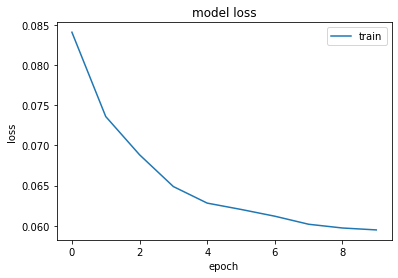

45/45 [==============================] - 0s 5ms/step
auroc:  0.5590496481922989
f1:  0.29831932773109243
threshold:  0.09961962
precision:  0.18198462101794213
recall:  0.826955074875208
accuracy:  0.366738894907909
specificity:  0.2772565512779036
CPU times: user 1min 1s, sys: 10.1 s, total: 1min 11s
Wall time: 25.5 s


In [99]:
%%time
### A single run w/out cross-validation
# with previous outcome added to the features
# outcome is added before scaling
seed(1)
set_seed(2)
model = build_model(32, 0.5, max_timestamps, n_features)
fit_model(model, 10, X_train_pad, y_train_pad, verbose=1)
y_predict = model.predict(X_test_pad)
y_test_len = [len(y) for y in y_test_list]
y_predict = truncate_prediction(y_predict, y_test_len)
y_true = np.concatenate(y_test_list)
print('auroc: ', auroc(y_predict, y_true))
f1, th = find_best_f1(y_predict, y_true)
print('f1: ', f1);
print('threshold: ', th)
precision, recall, accuracy, specificity = other_metrics(y_predict, y_true, th)
print('precision: ', precision)
print('recall: ', recall)
print('accuracy: ', accuracy)
print('specificity: ', specificity)

In [64]:
#y_predict

In [65]:
## Run 5-fold cross-validation to get average performance characteristics
#unit = 32
#ratio = 0.5
#epoch = 10
#(auroc_list, other_metric_list) = kfold_validation(unit, ratio, epoch, X_train_transformed, y_train, 'patient-id', \
#                                                   n_features=n_features, verbose=1)

In [66]:
## other_metric_list has precision, recall, accuracy, specificity, f1, threshold for metrics
#ave_prec = np.mean([x[0] for x in other_metric_list])
#print("average precision:" + str(ave_prec))

#ave_recall = np.mean([x[1] for x in other_metric_list])
#print("average recall:" + str(ave_recall))

#ave_specificity = np.mean([x[3] for x in other_metric_list])
#print("average specificity:" + str(ave_specificity))

#ave_f1 = np.mean([x[4] for x in other_metric_list])
#print("average F1:" + str(ave_f1))

In [67]:
#max_f1 = np.max([x[4] for x in other_metric_list])
#print("max F1: " + str(max_f1))

In [68]:
## Average metrics performance
#print("unit: %d\tepoch: %d\tauroc_mean: %f\tauroc_std: %f"  % (unit, epoch, np.mean(auroc_list), np.std(auroc_list)))

In [69]:
#from sklearn.metrics import confusion_matrix

## Anamod 

In [70]:
import anamod

In [71]:
from anamod import TemporalModelAnalyzer

In [72]:
# (observations, number of features, sequence) - that is how it shoild be in anamod input
# and we have the output of predict as (observations, sequence, features)

In [73]:
#def predict_func(X, y_test_list) :
#    y_predict = model.predict(X)
#    y_test_len = [len(y) for y in y_test_list]
#    y_predict = truncate_prediction(y_predict, y_test_len)
#    return(y_predict)

In [75]:
#predict_func(X_train_pad, y_test_list)

In [153]:
def p (X):
    X=np.transpose(X, axes=[0,2,1])
    y_pred=model.predict(X).reshape([10, 20])
    y_pred = np.mean(y_pred, axis = 1)
#     y_test_len = [len(y) for y in y_test_list]
# y_pred = truncate_prediction(y_pred, y_test_len)

    return(y_pred)
# X_xai = np.transpose(X_test_pad, axes = [0,2,1])

# p(X_xai).shape
y_pred = model.predict(X_test_pad[0:10]).reshape([10, 20])
y_pred = np.mean(y_pred, axis = 1)
y_pred.shape

1/1 [==============================] - 0s 32ms/step


(10,)

In [154]:
#explainers are usually used with the data it is trained with
#to explain prospective data use test data
analyzer = TemporalModelAnalyzer(p, np.transpose(X_test_pad, axes = [0,2,1])[0:10], y_pred, output_dir='anamod-test')
features = analyzer.analyze()

1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 27ms/step


1/1 [==============================] - 0s 41ms/step


1/1 [==============================] - 0s 35ms/step


1/1 [==============================] - 0s 35ms/step


1/1 [==============================] - 0s 37ms/step


1/1 [==============================] - 0s 27ms/step


1/1 [==============================] - 0s 36ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 27ms/step


1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 27ms/step


1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 27ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 27ms/step


1/1 [==============================] - 0s 34ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 27ms/step


1/1 [==============================] - 0s 27ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 27ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 42ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 27ms/step


1/1 [==============================] - 0s 27ms/step


1/1 [==============================] - 0s 27ms/step


1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 39ms/step


1/1 [==============================] - 0s 27ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 27ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 36ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 35ms/step


1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 27ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 36ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 36ms/step


1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 27ms/step


1/1 [==============================] - 0s 27ms/step


1/1 [==============================] - 0s 27ms/step


1/1 [==============================] - 0s 25ms/step


1/1 [==============================] - 0s 27ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 27ms/step


1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 36ms/step


1/1 [==============================] - 0s 45ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 38ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 27ms/step


1/1 [==============================] - 0s 33ms/step


1/1 [==============================] - 0s 27ms/step


1/1 [==============================] - 0s 36ms/step


1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 34ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 33ms/step


1/1 [==============================] - 0s 27ms/step


1/1 [==============================] - 0s 27ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 34ms/step


1/1 [==============================] - 0s 36ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 27ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 27ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 27ms/step


1/1 [==============================] - 0s 34ms/step


1/1 [==============================] - 0s 35ms/step


1/1 [==============================] - 0s 36ms/step


1/1 [==============================] - 0s 33ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 43ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 40ms/step


1/1 [==============================] - 0s 27ms/step


1/1 [==============================] - 0s 33ms/step


1/1 [==============================] - 0s 44ms/step


1/1 [==============================] - 0s 33ms/step


1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 37ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 27ms/step


1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 41ms/step


1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 27ms/step


1/1 [==============================] - 0s 27ms/step


1/1 [==============================] - 0s 27ms/step


1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 25ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 27ms/step


1/1 [==============================] - 0s 27ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 27ms/step


1/1 [==============================] - 0s 27ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 27ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 27ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 35ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 35ms/step


1/1 [==============================] - 0s 27ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 27ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 27ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 36ms/step


1/1 [==============================] - 0s 34ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 27ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 27ms/step


1/1 [==============================] - 0s 27ms/step


1/1 [==============================] - 0s 27ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 35ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 33ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 27ms/step


1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 27ms/step


1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 27ms/step


1/1 [==============================] - 0s 34ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 27ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 27ms/step


1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 34ms/step


1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 27ms/step


1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 38ms/step


1/1 [==============================] - 0s 34ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 49ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 36ms/step


1/1 [==============================] - 0s 27ms/step


1/1 [==============================] - 0s 27ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 37ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 38ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 26ms/step
Summary of important features: anamod-test/feature_importance.csv
Feature importance visualization: anamod-test/feature_importance_windows.png


In [155]:
model.predict(X_test_pad).shape

45/45 [==============================] - 0s 5ms/step


(1429, 20, 1)

In [156]:
y_predict.shape

(3692,)

In [79]:
#output_dir = "example_synthetic_temporal"
#num_features = 10
#synthesized_features, X, model_s = synmod.synthesize(output_dir=output_dir, num_instances=100, seed=100,
#                                                    num_features=num_features, fraction_relevant_features=0.5,
#                                                    synthesis_type="temporal", sequence_length=20, model_type="regressor")

## INNvestigate

In [ ]:
#import innvestigate

## Prediction vs. outcome

In [157]:
#all predictions above RNN threshold
(y_predict > 0.5)*1

array([0, 0, 0, ..., 0, 0, 0])

In [158]:
#true or false?
y_true == ((y_predict > 0.5) * 1)

array([ True,  True,  True, ...,  True,  True,  True])

In [159]:
#an array of patient IDs
X_test_transformed['patient-id'].values

array(['10385', '10386', '5030', ..., 'feae250c18c35ee64e91e6731e401ff6',
       'feae250c18c35ee64e91e6731e401ff6',
       'ff6e92ac2e24c4c454921ba6ced5ecfa'], dtype=object)

In [160]:
#make new databrame that contains patient IDs and whether RNN prediction is correct or not for each patient 
df_temp = pd.DataFrame(data={ 'positive_result':(y_true == ((y_predict > 0.5) * 1)), 'patient-id': X_test_transformed['patient-id'].values} )

In [161]:
#check if it works for one random patient
df_temp.loc[df_temp['patient-id']==10385, 'positive_result'].values

array([], dtype=bool)

In [162]:
#make a list of unique patient ID
pids = df_temp['patient-id'].unique()
positive_list = []
for pid in pids:
    positive_list.append(df_temp.loc[df_temp['patient-id']==pid, 'positive_result'].values)
print(len(positive_list))
print(len(X_test_list[50]))
print(positive_list[50].shape)


1429
13
(13,)


In [164]:
len(np.concatenate(X_test_list))

3692

In [165]:
f_names=X_test_use.columns.tolist()

In [166]:
f_names=f_names[1:]

In [167]:
f_names=f_names+['input_outcome_x', 'input_outcome_y']

In [168]:
len(f_names)

401

In [169]:
#names_array = np.asarray(f_names)

In [279]:
#l = [names_array]    

In [280]:
#len(l)

In [172]:
prediction=y_predict

In [173]:
pred_list=prediction.tolist()

In [174]:
pid_list=(X_test_use['patient-id'].values).tolist()

In [175]:
true_list=y_test.to_list()

In [176]:
pid_loc_pred = pd.DataFrame(np.column_stack([pid_list, true_list, pred_list]), 
                               columns=['patient-id', 'true outcome', 'RNN'])

In [177]:
pid_loc_pred

patient-id true outcome                  RNN
0                                10385            0  0.17468595504760742
1                                10386            0  0.14994922280311584
2                                 5030            0   0.1566573828458786
3                                 5030            0  0.09500941634178162
4                                 5030            0  0.13915662467479706
...                                ...          ...                  ...
3687  feae250c18c35ee64e91e6731e401ff6            0  0.14840319752693176
3688  feae250c18c35ee64e91e6731e401ff6            0  0.12329761683940887
3689  feae250c18c35ee64e91e6731e401ff6            0   0.1188122108578682
3690  feae250c18c35ee64e91e6731e401ff6            0  0.09928399324417114
3691  ff6e92ac2e24c4c454921ba6ced5ecfa            0  0.16016453504562378

[3692 rows x 3 columns]

In [398]:
#substitute RNN values > 0.5 with 1 and the rest with 0. 

temp = pid_loc_pred.copy()
temp['RNN'] = (temp['RNN']> '0.5').astype(int)
temp

#we can also use map
#data_frame(['column']).map({'initial_value_1':'updated_value_1','initial_value_2':'updated_value_2'})

patient-id true outcome  RNN
0                                10385            0    0
1                                10386            0    0
2                                 5030            0    0
3                                 5030            0    0
4                                 5030            0    0
...                                ...          ...  ...
3687  feae250c18c35ee64e91e6731e401ff6            0    0
3688  feae250c18c35ee64e91e6731e401ff6            0    0
3689  feae250c18c35ee64e91e6731e401ff6            0    0
3690  feae250c18c35ee64e91e6731e401ff6            0    0
3691  ff6e92ac2e24c4c454921ba6ced5ecfa            0    0

[3692 rows x 3 columns]

In [401]:
temp['RNN'].dtype

dtype('int64')

In [402]:
conditions = [temp['true outcome'].astype('int') > temp['RNN'], temp['true outcome'].astype('int') < temp['RNN']]

values = ['F', 'F']

temp['X'] = np.select(conditions, values, default='correct')

#print(conditions)

In [403]:
temp

patient-id true outcome  RNN        X
0                                10385            0    0  correct
1                                10386            0    0  correct
2                                 5030            0    0  correct
3                                 5030            0    0  correct
4                                 5030            0    0  correct
...                                ...          ...  ...      ...
3687  feae250c18c35ee64e91e6731e401ff6            0    0  correct
3688  feae250c18c35ee64e91e6731e401ff6            0    0  correct
3689  feae250c18c35ee64e91e6731e401ff6            0    0  correct
3690  feae250c18c35ee64e91e6731e401ff6            0    0  correct
3691  ff6e92ac2e24c4c454921ba6ced5ecfa            0    0  correct

[3692 rows x 4 columns]

In [411]:
new_df = temp.loc[temp['X'] == 'correct']

In [412]:
#this is the dataframe that contains only those patients for which RNN gave accurate prediction based on threshold 0.5.
new_df

patient-id true outcome  RNN        X
0                                10385            0    0  correct
1                                10386            0    0  correct
2                                 5030            0    0  correct
3                                 5030            0    0  correct
4                                 5030            0    0  correct
...                                ...          ...  ...      ...
3687  feae250c18c35ee64e91e6731e401ff6            0    0  correct
3688  feae250c18c35ee64e91e6731e401ff6            0    0  correct
3689  feae250c18c35ee64e91e6731e401ff6            0    0  correct
3690  feae250c18c35ee64e91e6731e401ff6            0    0  correct
3691  ff6e92ac2e24c4c454921ba6ced5ecfa            0    0  correct

[3091 rows x 4 columns]

In [406]:
temp.to_csv('test.csv')

In [390]:
#A=temp['true outcome']
#B=temp['RNN']
#lambda x : True if (x > 10 and x < 20) else False
#temp['compare'] = temp.apply(lambda x: True if temp['true outcome'] == temp['RNN'] else False)
#new_df = temp.groupby("patient-id").count().reset_index()
#m1 = new_df[(new_df["true outcome"] == 1 & new_df["RNN"] ==1) or (new_df["true outcome"] == 0 & new_df["RNN"] ==0)]["patient-id"]


In [414]:
temp.shape

(3692, 4)

In [413]:
new_df.shape

(3091, 4)

In [384]:
print(m1)

0       00402b576ed4ec085e12c9e079ae7f47
1       011614bd4929cf00ac92cd58b28e8804
2       014a7a9c25c4387424ef784722c3a4fd
3       01a7a2dc1250282eb07c7ba043db563f
4       02400c06730298e1d6586a9a518fd269
                      ...               
1424    fd091a695a8d76e9b41d5220b813553e
1425    fe1f147542696ece11e5e149cdeefafe
1426    fe3e03bd3440f855ade05020f84521e8
1427    feae250c18c35ee64e91e6731e401ff6
1428    ff6e92ac2e24c4c454921ba6ced5ecfa
Name: patient-id, Length: 1429, dtype: object


In [378]:
temp.loc[temp['patient-id'] == 'fd091a695a8d76e9b41d5220b813553e']

patient-id true outcome  RNN
3673  fd091a695a8d76e9b41d5220b813553e            0    0
3674  fd091a695a8d76e9b41d5220b813553e            0    0

In [ ]:
#print results only for those patients where 'compare' is False. 

In [278]:
#Map: Apply the same set of steps to each item, storing the result.
#Filter: Apply validation criteria, storing items that evaluate True.
#Reduce: Return a value that is passed from element to element.

In [209]:
#for i, k in zip(pid_loc_pred['true outcome'], pid_loc_pred['RNN']):
#    if k > 0.5 and i == 0:
#        print('False')

#zip(pid_loc_pred['true_outcome'], pid_loc_pred['RNN'])

In [210]:
# do this directly on the dataframe
#compare_list=[]
#for i in pid_loc_pred 


#k in zip(pid_loc_pred['true_outcome'], pid_loc_pred['RNN']): 
#    if k > 0.5 and i == 0: 
#        i='False'
#    else: 
#        if k >= 0.5 and i == 1: 
#            i='True'
#    compare_list.append(i)
#print(compare_list)

In [272]:
pid_loc_pred1 = pid_loc_pred

In [273]:
pid_loc_pred1 = pd.DataFrame(np.column_stack([pid_list, true_list, pred_list, compare_list]), 
                               columns=['patient-id', 'true outcome', 'RNN', 'compare'])

In [274]:
pid_loc_pred1

patient-id true outcome                  RNN  \
0                                10385            0  0.17468595504760742   
1                                10386            0  0.14994922280311584   
2                                 5030            0   0.1566573828458786   
3                                 5030            0  0.09500941634178162   
4                                 5030            0  0.13915662467479706   
...                                ...          ...                  ...   
3687  feae250c18c35ee64e91e6731e401ff6            0  0.14840319752693176   
3688  feae250c18c35ee64e91e6731e401ff6            0  0.12329761683940887   
3689  feae250c18c35ee64e91e6731e401ff6            0   0.1188122108578682   
3690  feae250c18c35ee64e91e6731e401ff6            0  0.09928399324417114   
3691  ff6e92ac2e24c4c454921ba6ced5ecfa            0  0.16016453504562378   

     compare  
0          0  
1          0  
2          0  
3          0  
4          0  
...      ...  
3687       0  
3688       0  
3689       0  
3690       0  
3691       0  

[3692 rows x 4 columns]

In [ ]:
# do this directly on the dataframe
# for i, k in pid_loc_pred1['true outcome'], pid_lod_pred1['RNN']: 
# if k > 0.2 and i == 0: 
# False
# if k >= 0.2 and i == 1: True

In [213]:
#! pip install timeshap

In [264]:
#X_train_pad.shape

In [265]:
#X_train_pad[9:10].shape

In [212]:
#import timeshap 

In [259]:
#def f(x):
#    y = model.predict(x)
#    y = np.reshape(y, (y.shape[1],1))
#    return y
    

In [260]:
#a = model.predict(X_train_pad[9:10])

In [261]:
#f(X_train_pad[9:10]).shape

In [262]:
#np.reshape(a, (20, 1)).shape

In [263]:
# we won't always get 20, so we need to make it more dynamic
#np.reshape(a, (a.shape[1], 1))

In [256]:
#from timeshap.utils import calc_avg_event
#average_event = calc_avg_event(X_train_pad, numerical_feats=np.linspace(1,20,20), categorical_feats=[])


In [257]:
#np.linspace(1,20,20)

In [258]:
#y_train_pad.shape

In [ ]:
# we can only explain the last layer (similar issue as with anamod)
# timeSHAP works on sequence to instance, i.e. for these 20 sequences
# there is only one prediction 
# Feature Importance in time FIT is the only one that works sequence to sequence 


In [ ]:
# Look into FIT and try to contact the author 
# And ask him how to run it on our own models 